In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
food = pd.read_csv(r'C:\Users\Matt\OneDrive\Documents\IT Learning\Example_Folder\u_food_marketing.csv')

food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [72]:
pd.set_option('display.max.rows', 2205)
pd.set_option('display.max.columns', 50)


In [ ]:
#saying segmentation is kind of like saying group by

In [ ]:
#first we need to clean data and combine a bunch of these columns

In [50]:
#check for duplicates
food[food.duplicated()].sum()

Income                  9366769.0
Kidhome                      79.0
Teenhome                     87.0
Recency                    9277.0
MntWines                  55672.0
MntFruits                  4936.0
MntMeatProducts           28906.0
MntFishProducts            7256.0
MntSweetProducts           4708.0
MntGoldProds               8380.0
NumDealsPurchases           403.0
NumWebPurchases             725.0
NumCatalogPurchases         488.0
NumStorePurchases          1104.0
NumWebVisitsMonth           975.0
AcceptedCmp3                 12.0
AcceptedCmp4                  9.0
AcceptedCmp5                 15.0
AcceptedCmp1                  9.0
AcceptedCmp2                  4.0
Complain                      1.0
Z_CostContact               552.0
Z_Revenue                  2024.0
Response                     22.0
Age                        9358.0
Customer_Days            464574.0
marital_Divorced             16.0
marital_Married              69.0
marital_Single               34.0
marital_Togeth

In [52]:
food[food.duplicated()].count()

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
NumCatalogPurchases     184
NumStorePurchases       184
NumWebVisitsMonth       184
AcceptedCmp3            184
AcceptedCmp4            184
AcceptedCmp5            184
AcceptedCmp1            184
AcceptedCmp2            184
Complain                184
Z_CostContact           184
Z_Revenue               184
Response                184
Age                     184
Customer_Days           184
marital_Divorced        184
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD       

In [54]:
#remove duplicates
food.drop_duplicates(keep = False, inplace = True)

In [56]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [58]:
#we are combining the kid home and teen home column since we just want to know how many children we have 
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)

In [60]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [62]:
#combining marital status here we take marital divocred and we are saying if it has a 1 value make it 5, if 0 leave 0
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})

In [64]:
#lets check if it worked
food[food['marital_Divorced'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,1,0,0,563,536,0,1
11,63033.0,0,0,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0,61,2385,5,0,0,0,0,0,0,1,0,0,1072,1042,0,0
12,59354.0,1,1,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,3,11,0,68,2385,5,0,0,0,0,0,0,0,1,0,296,282,0,2
31,46610.0,0,2,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1,68,2767,5,0,0,0,0,0,0,0,0,1,259,216,0,2
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,1,0,0,1376,1135,2,0


In [66]:
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [68]:
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow' ]].sum(axis = 1)

In [70]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [74]:
#Now we are going to add another column and change the 1 2 3 4 5 into words with the Map function
food['Marital_Status_Str'] = food['Marital_Status'].map({5: 'Divorced', 4:'Married', 3:'Single', 2:'Together', 1:'Widow'})

In [76]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [80]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [106]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:5,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:4,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:2,0:0})
food['education_PhD '] = food['education_PhD'].replace({1:1,0:0})

In [108]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1


In [110]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1


In [112]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD ' ]].sum(axis = 1)

In [130]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1,0


In [142]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response' ]].sum(axis = 1)

In [144]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [132]:
food.corr(method = 'pearson', numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns       1.000000
AcceptedCmpOverall       0.859712
AcceptedCmp4             0.561592
AcceptedCmp3             0.546838
AcceptedCmp5             0.531799
AcceptedCmp1             0.514231
MntWines                 0.461281
MntTotal                 0.408568
MntRegularProds          0.408493
Response                 0.360220
Income                   0.328398
NumCatalogPurchases      0.320972
MntMeatProducts          0.273522
NumWebPurchases          0.217850
AcceptedCmp2             0.210447
NumStorePurchases        0.194347
MntGoldProds             0.173950
MntSweetProducts         0.146843
MntFishProducts          0.142262
MntFruits                0.136188
education_PhD            0.028309
education_PhD            0.028309
marital_Widow            0.016490
marital_Single           0.010632
Age                      0.005825
education_Graduation     0.003683
education_Graduation     0.003683
marital_Married          0.001860
education_Master         0.000718
marital_Togeth

<Axes: >

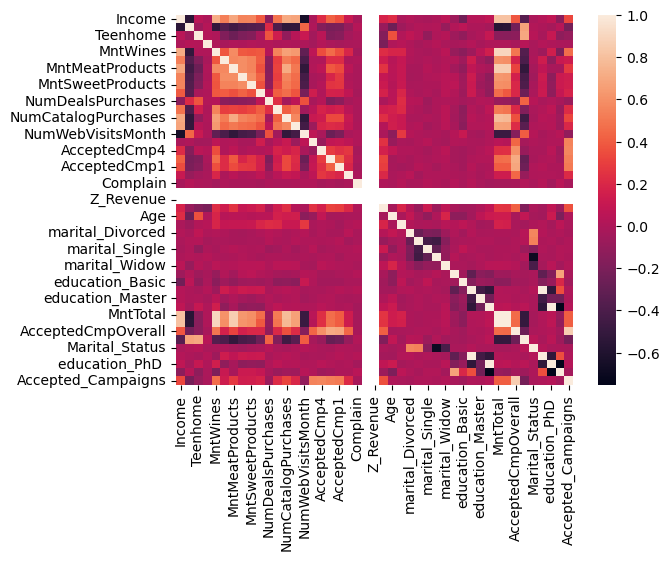

In [134]:
sns.heatmap(food.corr(method = 'pearson', numeric_only = True))

<Axes: >

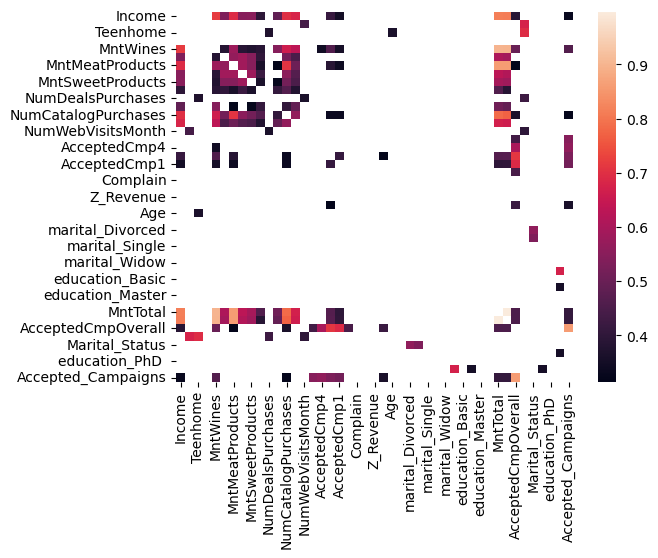

In [136]:
all_correlations = food.corr(method = 'pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations <1)]
sns.heatmap(all_correlations)

In [138]:
all_correlations

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns
Income,NaN,NaN,NaN,NaN,0.718586,0.533494,0.691688,0.547056,0.549524,0.396398,NaN,0.486613,0.700180,0.681802,NaN,NaN,NaN,0.413727,0.349307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814970,0.810225,0.384189,NaN,NaN,NaN,NaN,NaN,0.328398
Kidhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674966,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.371120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694690,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,0.718586,NaN,NaN,NaN,NaN,0.381203,0.579982,0.386242,0.374792,0.388708,NaN,0.543781,0.660914,0.632089,NaN,NaN,0.345016,0.457363,0.355926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898154,0.897403,0.496881,NaN,NaN,NaN,NaN,NaN,0.461281
MntFruits,0.533494,NaN,NaN,NaN,0.381203,NaN,0.567087,0.587872,0.545783,0.401946,NaN,NaN,0.514758,0.447950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605405,0.591883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,0.691688,NaN,NaN,NaN,0.579982,0.567087,NaN,0.586524,0.544004,0.361868,NaN,0.315307,0.707483,0.503880,NaN,NaN,NaN,0.384858,0.340518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858091,0.858257,0.314922,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,0.547056,NaN,NaN,NaN,0.386242,0.587872,0.586524,NaN,0.582817,0.419708,NaN,NaN,0.552808,0.464133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629339,0.615109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,0.549524,NaN,NaN,NaN,0.374792,0.545783,0.544004,0.582817,NaN,0.363387,NaN,0.323176,0.515241,0.448369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594134,0.583754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntGoldProds,0.396398,NaN,NaN,NaN,0.388708,0.401946,0.361868,0.419708,0.363387,NaN,NaN,0.409481,0.463596,0.375546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460496,0.385640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
all_correlations['Accepted_Campaigns']

Income                   0.328398
Kidhome                       NaN
Teenhome                      NaN
Recency                       NaN
MntWines                 0.461281
MntFruits                     NaN
MntMeatProducts               NaN
MntFishProducts               NaN
MntSweetProducts              NaN
MntGoldProds                  NaN
NumDealsPurchases             NaN
NumWebPurchases               NaN
NumCatalogPurchases      0.320972
NumStorePurchases             NaN
NumWebVisitsMonth             NaN
AcceptedCmp3             0.546838
AcceptedCmp4             0.561592
AcceptedCmp5             0.531799
AcceptedCmp1             0.514231
AcceptedCmp2                  NaN
Complain                      NaN
Z_CostContact                 NaN
Z_Revenue                     NaN
Response                 0.360220
Age                           NaN
Customer_Days                 NaN
marital_Divorced              NaN
marital_Married               NaN
marital_Single                NaN
marital_Togeth

In [148]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1,0


In [150]:
food['Age'].sort_values()

43      24
1150    24
2180    25
727     25
1824    25
894     26
400     26
1143    26
1330    27
2061    27
901     27
811     28
1787    28
2131    28
1688    28
295     28
129     28
2054    28
1226    28
1340    28
1046    28
891     28
1696    29
1961    29
1649    29
826     29
1022    29
873     29
102     29
505     29
1159    29
709     29
1547    29
2014    29
104     29
528     30
1152    30
1582    30
1821    30
1187    30
229     30
2167    30
1587    30
1668    30
1469    30
2134    30
1932    30
1389    30
500     30
485     30
1865    31
179     31
534     31
1293    31
1511    31
1515    31
668     31
718     31
1121    31
26      31
414     31
411     31
410     31
1676    31
913     31
911     31
973     31
839     31
843     31
683     32
1823    32
457     32
1537    32
1510    32
133     32
1509    32
207     32
1467    32
53      32
193     32
156     32
180     32
1567    32
289     32
282     32
169     32
742     32
952     32
1039    33
1503    33
381     33

In [162]:
#we want to look at ages, but lets make ages into age groups like this:
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return ("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [164]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1,0,31 - 40


#Above Function did not work lets fix it return f"{age_range[0] - age_range[1]}" is the issue needed to close brackets like this return f"{age_range[0]} - {age_range[1]}" Now instead of subtracting values from ranges we have the proper range


In [166]:
food[['Age', 'Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

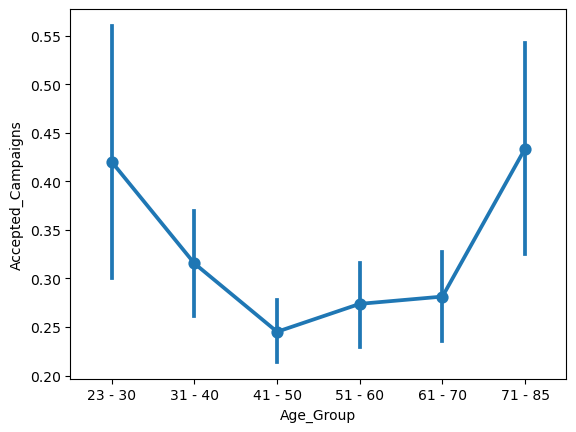

In [170]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']
sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

#The vertical lines here are confidence intervals, meaning if there is a really large line we are not super confident in these numbers like in ranges 23-30 or 71-85 which could mean we have small sample sizes in those age groups. Using the prompt below confirms this suspicion.

In [176]:
counts = food['Age_Group'].value_counts()

In [178]:
#change to percentage
percentage = counts / food.shape[0]
percentage

Age_Group
41 - 50    0.332067
51 - 60    0.221921
61 - 70    0.212154
31 - 40    0.161693
71 - 85    0.045035
23 - 30    0.027130
Name: count, dtype: float64

In [182]:
percent_food = percentage.reset_index()

In [186]:
percent_food.columns = ['age_group', 'percentage']

In [188]:
percent_food

,age_group,percentage
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
3,31 - 40,0.161693
4,71 - 85,0.045035
5,23 - 30,0.027130


In [192]:
percent_food = percent_food.sort_values('age_group')

In [194]:
percent_food

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


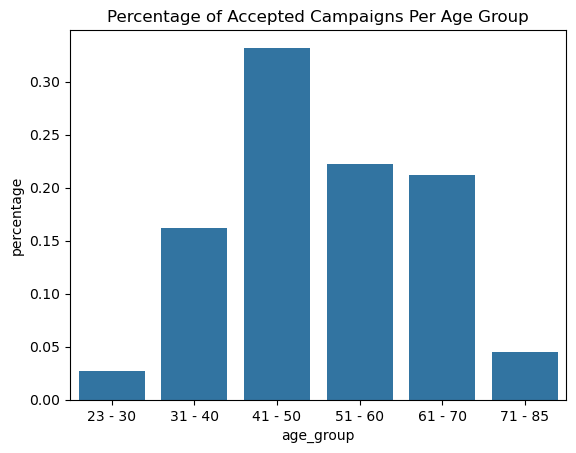

In [198]:
sns.barplot(x = 'age_group', y = 'percentage', data = percent_food)
plt.title('Percentage of Accepted Campaigns Per Age Group')
plt.show()

In [ ]:
#Age Segmentation - core audience for accepting campaigns right now is 31 -70 year olds. 

In [200]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1,0,31 - 40


In [204]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

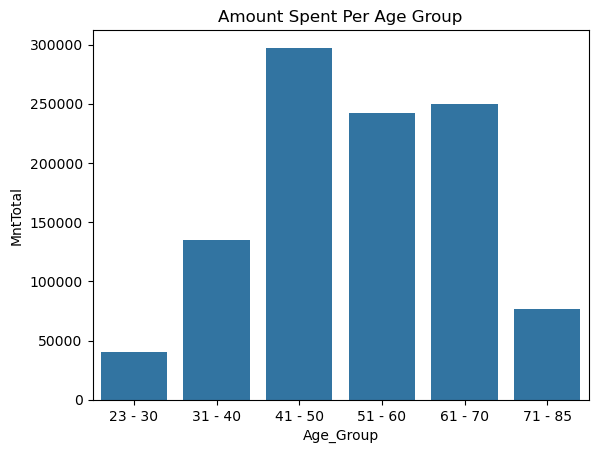

In [212]:
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title('Amount Spent Per Age Group')
plt.show()

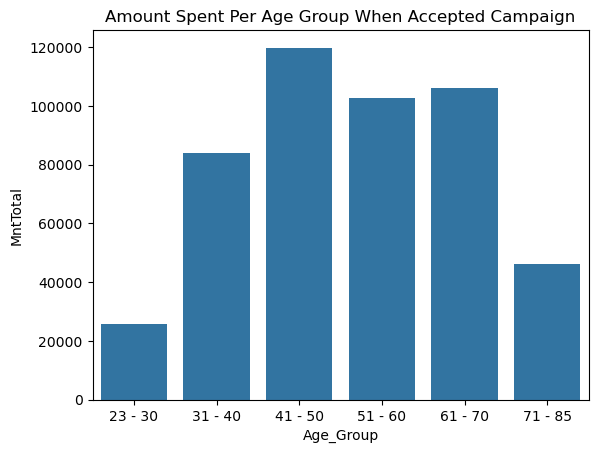

In [216]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = acct_camp .groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title('Amount Spent Per Age Group When Accepted Campaign')
plt.show()

In [ ]:
#Age Segmentation - core audience for accepting campaigns right now is 31 -70 year olds. 23-30, 71 and up accept at higher rates.

In [218]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,education_Graduation,education_PhD,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,3,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married,0,1,1,0,31 - 40


In [220]:
food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
5,6,4,10
6,7,3,7
7,4,0,4
8,3,0,2
9,1,0,0


In [228]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ["Sum"])

In [232]:
sum_food = sum_food.reset_index()

In [234]:
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace =True)

In [236]:
sum_food

,Type_of_Purchase,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

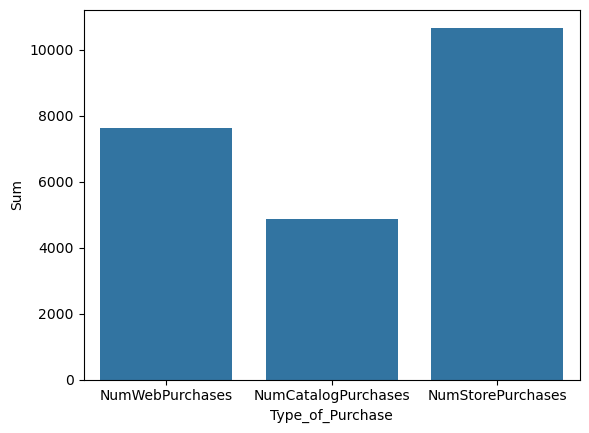

In [238]:
sns.barplot( x = 'Type_of_Purchase', y = 'Sum', data = sum_food)

<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

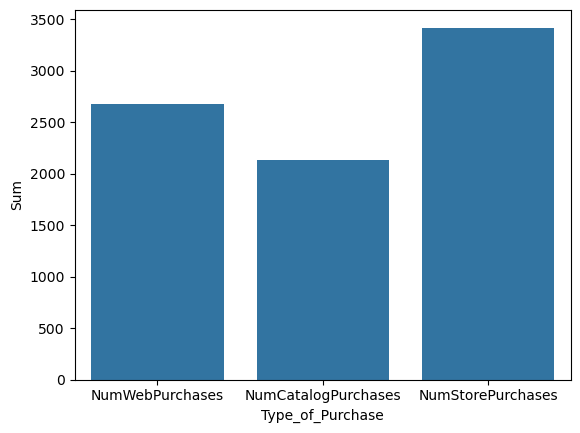

In [244]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ["Sum"])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace =True)
sns.barplot( x = 'Type_of_Purchase', y = 'Sum', data = sum_food)

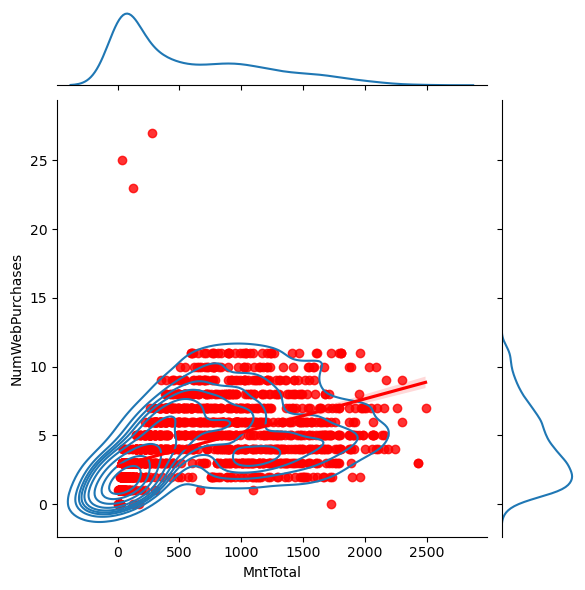

In [252]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')

x.plot_joint(sns.regplot, color = 'r')

Jointplots show distirbution this shows positive correlation

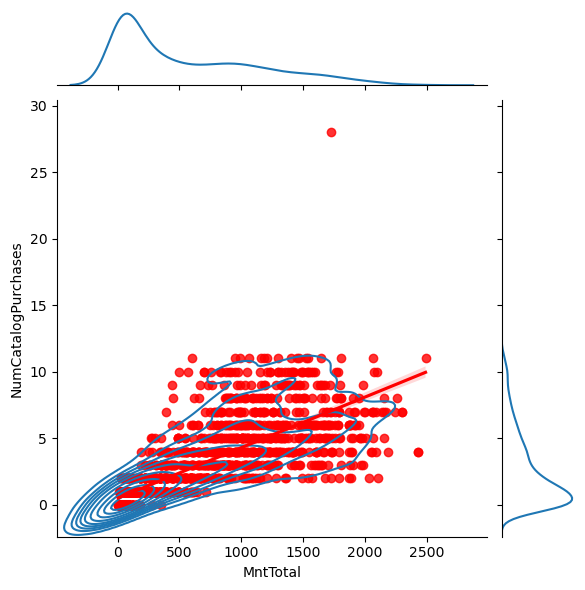

In [254]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')

x.plot_joint(sns.regplot, color = 'r')

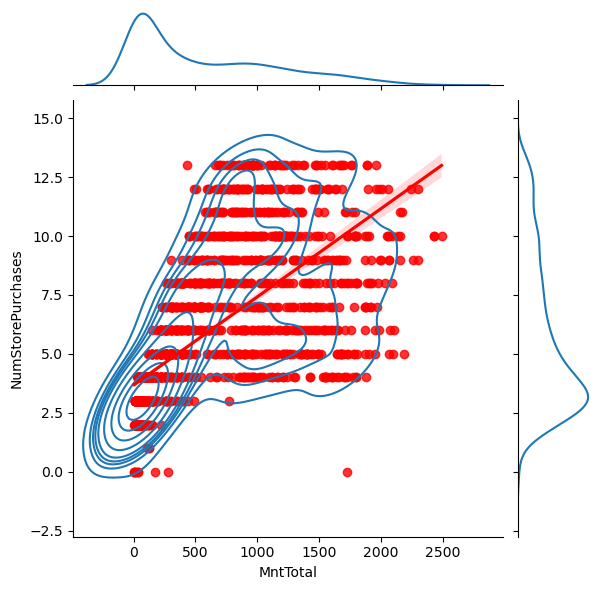

In [256]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')

x.plot_joint(sns.regplot, color = 'r')

In [ ]:
# 2 directions: Boost up the higher percentage catalog customers. Or Focus on in store/web because they have more traffic.

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

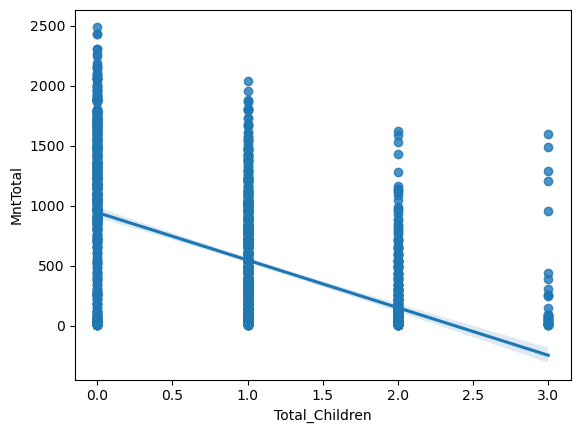

In [266]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

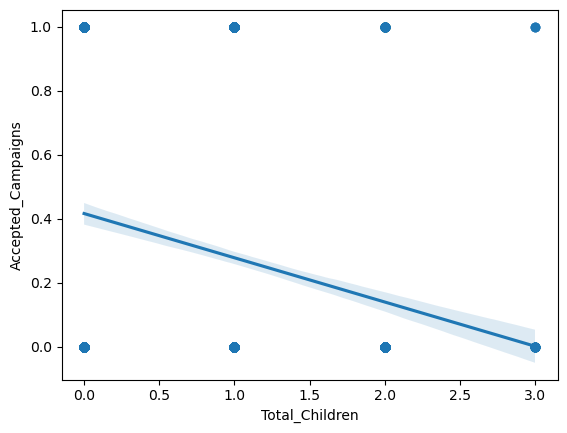

In [268]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

In [ ]:
#Less kids = more likely to accept campaigns. People with more kids spend less money.

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

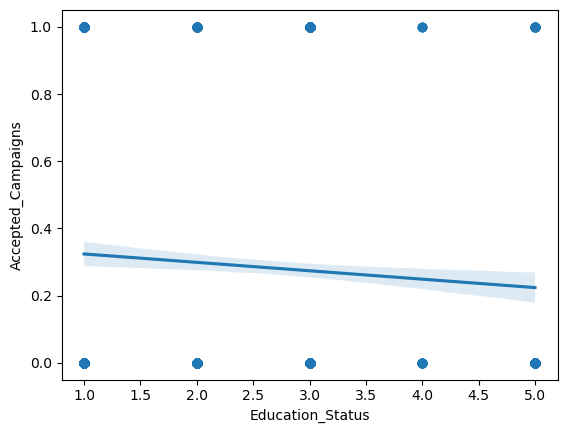

In [270]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

In [ ]:
#1.0 is PHD level 5 is least educated, so more educated people accept campaigns

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

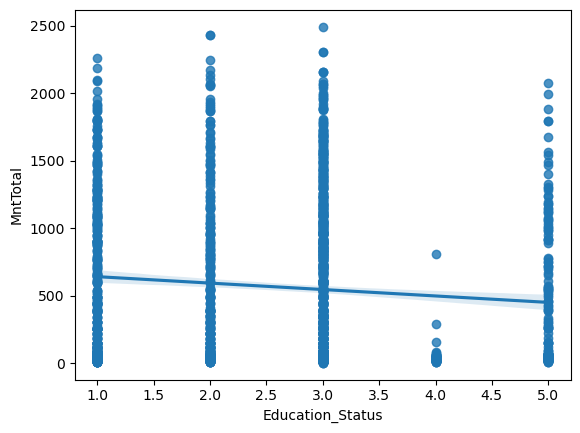

In [272]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)

In [ ]:
#Education is not really significant in segmentation

In [ ]:
#Lets look at Marriage Status

<Axes: xlabel='Marital_Status_Str', ylabel='count'>

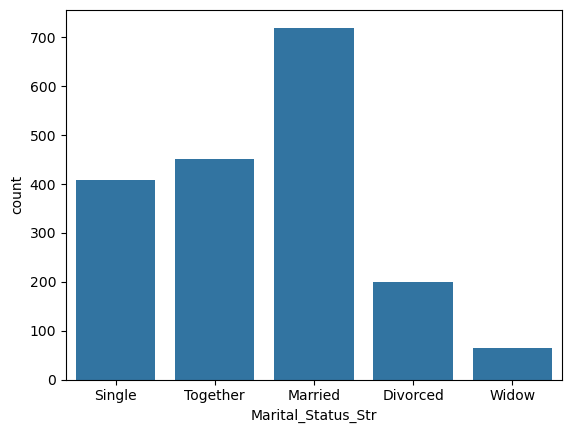

In [276]:
sns.countplot(x = 'Marital_Status_Str', data = food)

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

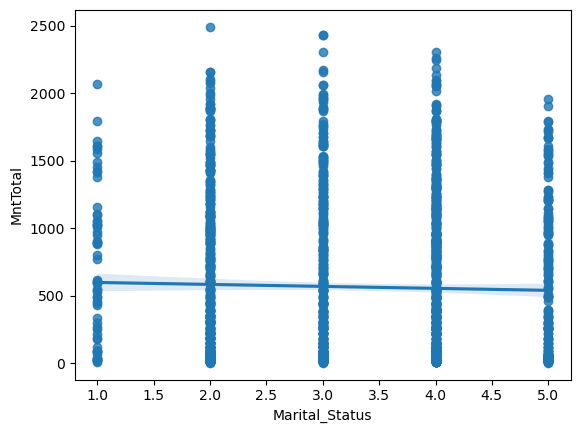

In [280]:
sns.regplot(x = 'Marital_Status', y ='MntTotal', data = food)

In [290]:
acct= food[food['Accepted_Campaigns'] != 0]

relationship_food = acct.groupby('Marital_Status_Str')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status_Str', ylabel='MntTotal'>

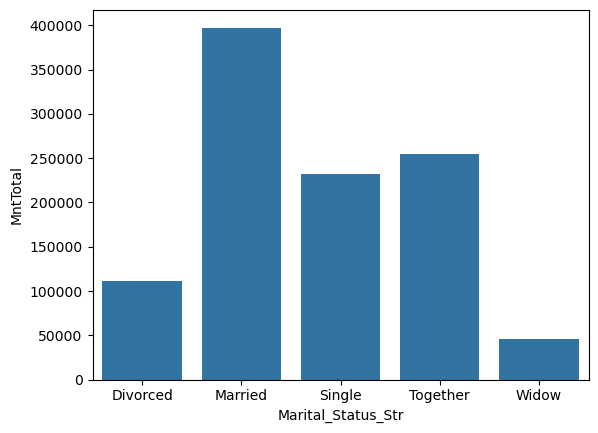

In [288]:
sns.barplot(data = relationship_food, x = 'Marital_Status_Str', y = 'MntTotal')

<Axes: xlabel='Marital_Status_Str', ylabel='MntTotal'>

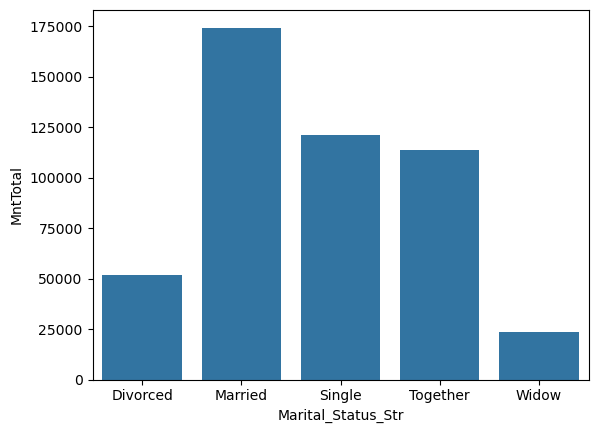

In [292]:
sns.barplot(data = relationship_food, x = 'Marital_Status_Str', y = 'MntTotal')

In [302]:
total = food['Marital_Status_Str'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_Str'].value_counts()

In [304]:
percent_marital = accepted / total * 100

In [310]:
pect_food = percent_marital.reset_index()
pect_food.columns = ['Marital_Status_Str', 'Percentage']

<Axes: xlabel='Marital_Status_Str', ylabel='Percentage'>

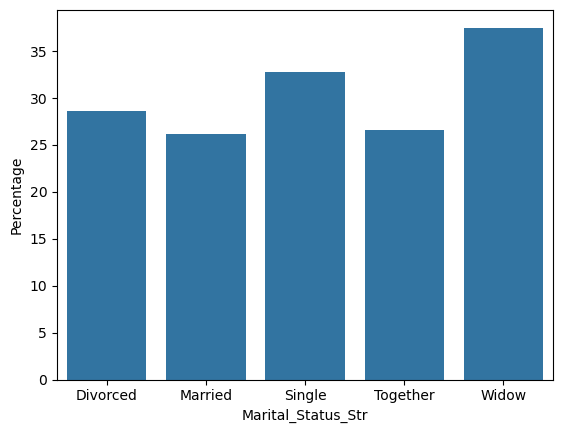

In [312]:
sns.barplot(data = pect_food, x = 'Marital_Status_Str', y = 'Percentage')

In [ ]:
# Marriage -  Married, Single, and together are spending a lot more money than widow and divorced. WE should Focus on this segment.

Overall Findings:
1.Age - 30-70 were spending more money but less likely to accept campaigns. Higher volume here. 
2. Catalog was more likely to accept campaigns, but in per spends more, reccomend split between all. 
- 40% Catalog, 30% Store, 30% Web
3. Focus on people without or less kids
4. Education level had no impact don't target any group for campaigns
5. Martital Status doesn't p play a big part. Married, Single, Together spend more money

Money Making:
1. Middle Age people, high earners no kids. Target on different platforms with split above.
New Users to spend money:
2. Focus on 21-30, 70 and up who statistically accepted campaigns at a higher rate. 